# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# print (lats)
# print (lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        # print (city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    # print (city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_response = requests.get(city_url)
        print (city_weather_response)
        city_weather = city_weather_response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
<Response [200]>
Processing Record 2 of Set 1 | saudarkrokur
<Response [200]>
Processing Record 3 of Set 1 | mount isa
<Response [200]>
Processing Record 4 of Set 1 | invercargill
<Response [200]>
Processing Record 5 of Set 1 | edinburgh of the seven seas
<Response [200]>
Processing Record 6 of Set 1 | prado
<Response [200]>
Processing Record 7 of Set 1 | longyearbyen
<Response [200]>
Processing Record 8 of Set 1 | port-aux-francais
<Response [200]>
Processing Record 9 of Set 1 | ribeira grande
<Response [200]>
Processing Record 10 of Set 1 | waitangi
<Response [200]>
Processing Record 11 of Set 1 | margaret river
<Response [200]>
Processing Record 12 of Set 1 | olonkinbyen
<Response [200]>
Processing Record 13 of Set 1 | bredasdorp
<Response [200]>
Processing Record 14 of Set 1 | claveria
<Response [200]>
Processing Record 15 of Set 1 | puerto natales
<Response [200]>
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,20.25,65,0,3.04,PN,1715505336
1,saudarkrokur,65.7461,-19.6394,4.60,96,100,1.60,IS,1715505336
2,mount isa,-20.7333,139.5000,23.87,46,7,5.14,AU,1715505337
3,invercargill,-46.4000,168.3500,11.12,92,100,3.58,NZ,1715505337
4,edinburgh of the seven seas,-37.0676,-12.3116,15.54,85,100,4.98,SH,1715505338


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.25,65,0,3.04,PN,1715505336
1,saudarkrokur,65.7461,-19.6394,4.60,96,100,1.60,IS,1715505336
2,mount isa,-20.7333,139.5000,23.87,46,7,5.14,AU,1715505337
3,invercargill,-46.4000,168.3500,11.12,92,100,3.58,NZ,1715505337
4,edinburgh of the seven seas,-37.0676,-12.3116,15.54,85,100,4.98,SH,1715505338


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

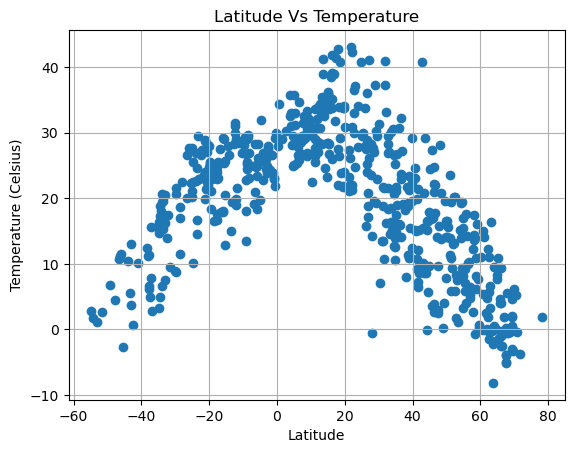

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

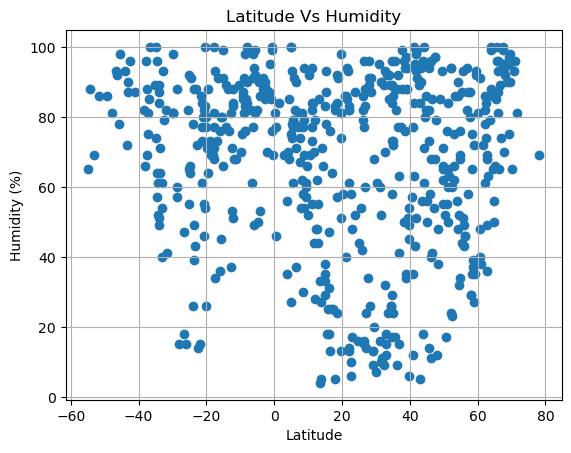

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

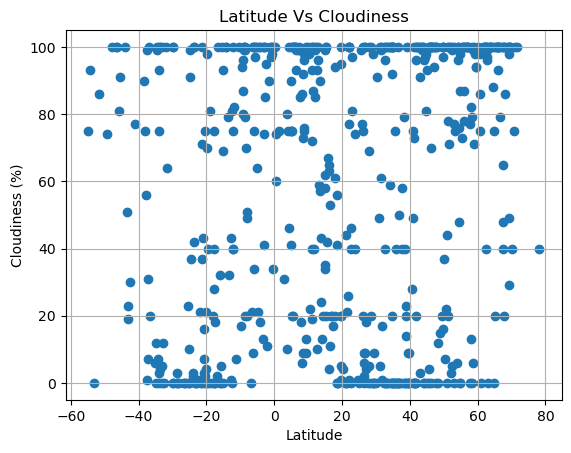

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

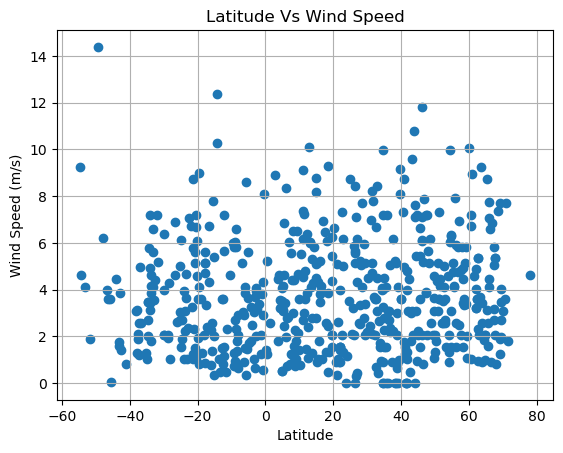

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude Vs Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regress_plots(x_values, y_values, x_label, y_label, a_cord_x, a_cord_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line values
    # regress_values = x_values * slope + intercept
    regress_values = [slope * i + intercept for i in x_values]
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # print (line_eq)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(a_cord_x,a_cord_y),fontsize=15,color="red")
    # plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# # Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saudarkrokur,65.7461,-19.6394,4.60,96,100,1.60,IS,1715505336
6,longyearbyen,78.2186,15.6401,1.91,69,40,4.63,SJ,1715505339
8,ribeira grande,38.5167,-28.7000,19.32,94,40,5.14,PT,1715505340
11,olonkinbyen,70.9221,-8.7187,-0.34,96,100,7.72,SJ,1715505342
13,claveria,18.6074,121.0832,29.22,84,41,3.85,PH,1715505343


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.25,65,0,3.04,PN,1715505336
2,mount isa,-20.7333,139.5000,23.87,46,7,5.14,AU,1715505337
3,invercargill,-46.4000,168.3500,11.12,92,100,3.58,NZ,1715505337
4,edinburgh of the seven seas,-37.0676,-12.3116,15.54,85,100,4.98,SH,1715505338
5,prado,-17.3411,-39.2208,23.11,93,18,2.38,BR,1715505338


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8269137934570493


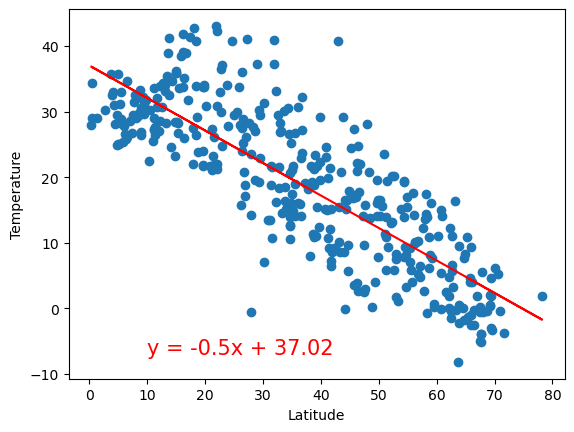

In [30]:
# Linear regression on Northern Hemisphere
linear_regress_plots(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Temperature",10,-7)


The r-value is: 0.7648868731287765


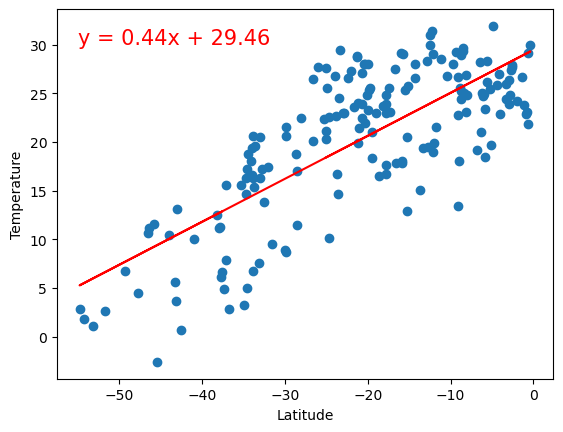

In [33]:
# Linear regression on Southern Hemisphere
linear_regress_plots(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Temperature",-55,30)

### Discussion about the linear relationship:

- #### Northern Hemisphere:
It can be seen that as the latitude increases, the temperature decreases. There is a negative linear correlation between latitude and temperature. This is also indicated by the negative gradient/slope in the equation for the linear regression line. The r_value of -0.8269 tells us that the negative correlation is strong.
This is expected as increasing latitude in the northern hemisphere means getting further from the equator, therefore getting colder.

- #### Southern Hemisphere:
It can be seen that as the latitude increases, the temperature increases. There is a positive linear correlation between latitude and temperature. This is also indicated by the positive gradient/slope in the equation for the linear regression line. The r_value of 0.7649 tells us that the positive correlation is strong.
This is expected as increasing latitude in the south hemisphere means getting close to the equator, therefore getting hotter.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.16544442627234504


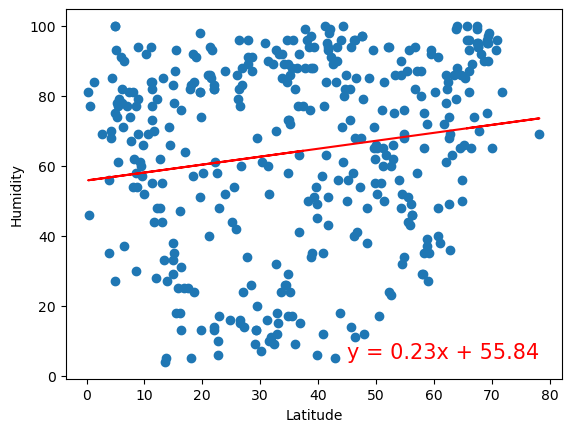

In [35]:
# Northern Hemisphere
linear_regress_plots(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity",45,5)

The r-value is: 0.09012045952602732


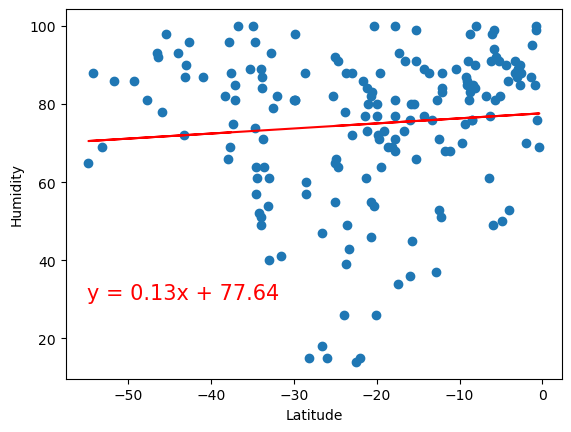

In [38]:
# Southern Hemisphere
linear_regress_plots(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity",-55,30)

### Discussion about the linear relationship:

 - #### Northern Hemisphere:
It can be seen that as the latitude increases, the humidity increases by a small amount. That is, there is a weak positive linear correlation between latitude and humidity. This is also indicated by the small positive gradient/slope in the equation for the linear regression line.
The r_value of 0.1654 tells us that the positive correlation is weak.

 - #### Southern Hemisphere:
It can be seen that as the latitude increases, the humidity increases by a small amount. That is, there is a weak positive linear correlation between latitude and humidity. This is also indicated by the small positive gradient/slope in the equation for the linear regression line.
The r_value of 0.0901 tells us that the positive correlation is very weak.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.14547307385982514


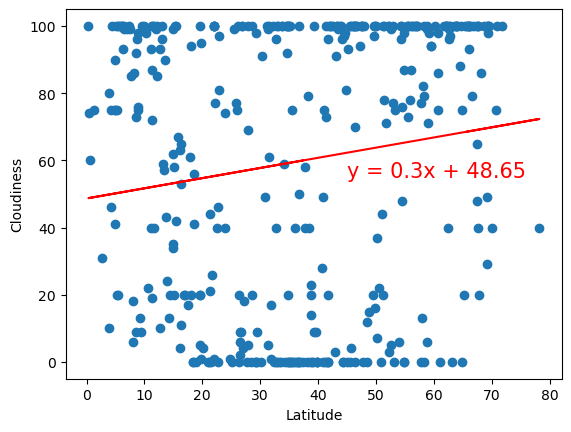

In [42]:
# Northern Hemisphere
linear_regress_plots(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness",45,55)

The r-value is: 0.1380340150583138


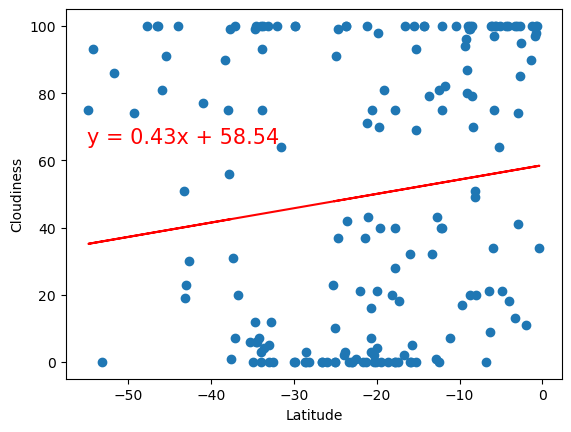

In [47]:
# Southern Hemisphere
linear_regress_plots(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness",-55,65)

#### Discussion about the linear relationship:

- #### Northern Hemisphere:

It can be seen that as the latitude increases, the cloudiness increases. That is, there is a weak positive linear correlation between latitude and cloudiness. This is also indicated by the very small positive gradient/slope in the equation for the linear regression line. The r_value of 0.1455 tells us that the negative correlation is very weak.

 - #### Southern Hemisphere:

It can be seen that as the latitude increases, the cloudiness increases. That is, there is a weak positive linear correlation between latitude and cloudiness. This is also indicated by the very small positive gradient/slope in the equation for the linear regression line. The r_value of 0.1380 tells us that the positive correlation is very weak.
 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05914777949665448


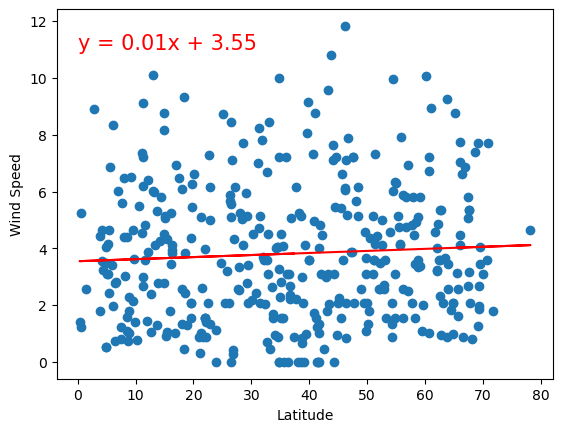

In [49]:
# Northern Hemisphere
linear_regress_plots(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed",0,11)

The r-value is: -0.12052513151401278


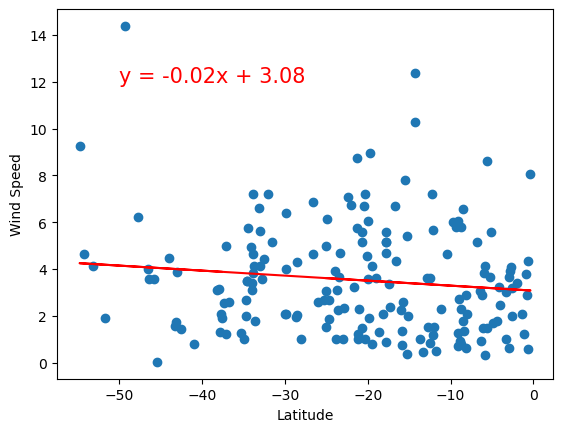

In [51]:
# Southern Hemisphere
linear_regress_plots(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed",-50,12)

#### Discussion about the linear relationship:

- #### Northern Hemisphere:

It can be seen that as the latitude increases, the wind speed increases by a very small amount. That is, there is a very weak positive linear correlation between latitude and wind speed. This is also indicated by the very small positive gradient/slope in the equation for the linear regression line. The r_value of 0.0591 tells us that the positive linear correlation is very weak.

 - #### Southern Hemisphere:

It can be seen that as the latitude increases, the wind speed decreases by a very small amount. That is, there is a very weak negative linear correlation between latitude and wind speed. This is also indicated by the small negative gradient/slope in the equation for the linear regression line. The r_value of -0.1205 tells us that the negative correlation is very weak.
 